#W07 G5 Challenges and solutions when handling imbalanced datasets



<div style="display: flex; align-items: center; justify-content: space-between;">

  <!-- LEFT SIDE: Text -->
  <div style="flex: 1; padding-right: 20px;">
    <h3>What is an Imbalanced Dataset?</h3>
    <ul>
      <li>A dataset where one class has far fewer samples than the other.</li>
      <li>Common in fraud detection, medical diagnosis, and text classification.</li>
      <li>Causes models to favor the majority class, missing rare but critical cases.</li>
      <li>Imbalance ratios can reach 100:1 or higher.</li>
      <li>Leads to misleading accuracy and poor minority-class performance.</li>
    </ul>
    <p><b>Reference</b>: Ramyachitra, D., & Manikandan, P. (2014).
    <i>Imbalanced dataset classification and solutions: A review.</i>
    <a href="https://www.worldscientific.com/doi/abs/10.1142/S0218001409007326" target="_blank">World Scientific</a></p>
  </div>

  <!-- RIGHT SIDE: Image -->
  <div style="flex: 0 0 3%; text-align: right;">
    <img src="https://drive.google.com/uc?id=1HkjRogCF3JfP_ywYLDzmwV6816XZJGgw"
         alt="Imbalanced dataset"
         style="width: 70%; max-width: 10px; border-radius: 10px; box-shadow: 0 2px 6px rgba(0,0,0,0.2);">
  </div>

# Challenges in Imbalanced Datasets

**Biased models:**
Algorithms often favor the majority class, achieving high accuracy but failing to detect rare cases

**Deceptive accuracy:**
Standard accuracy mostly reflects performance on the dominant class, giving a false sense of model success

**Overlooked anomalies:**
In fields like healthcare or fraud detection, missing rare but critical events can lead to serious consequences

# Overview of methods to handle imbalanced data in classification

1. **Data-level methods**: re-balance data distribution through resampling

2. **Algorithmic level methods**: alter the training process to enhance learning in the minority class

3. **Ensemble learning approaches**: combine several classifiers' decisions

## **1. Data-level methods**

Re-balance data distribution through resampling

* **Undersampling**: reduce the number of majortiy class samples, randomly or following rules (eg. Random Undersampling, Tomek Links, and Cluster Centroids)
  * less CPU demanding training
  * valuable information can be lost -> can fail at generalization
* **Oversampling**: increase the number of minority class samples with synthetic data (eg. SMOTE, ADASYN, SMOTE variations)
  * more CPU demanding training
  * may give wrong perception of the data
  * can lead to overfitting
* **Hybrid methods**: combining over- and undersampling

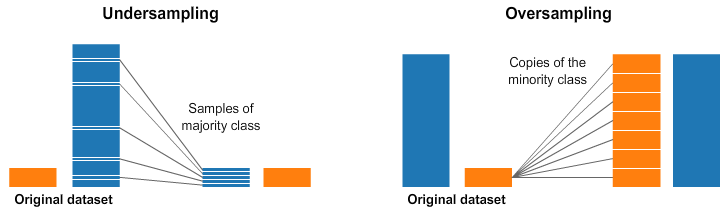

## **2. Algorithmic level methods**
Modify the training process to enhance learning in the minority class
  * **Cost-sensitive learning**: penalization of misclassifications of the minority class (eg. MetaCost)
    * particularly useful in applications where accurately identifying underrepresented classes is critical
  * **Algorithm-specific adjustments**: customizing methods like decision trees, random forests, and SVMs to handle imbalanced data more effectively (eg. SVM with Multiple Kernel Learning (MKL))
    * for example: adjusting the class decision threshold when converting predicted probabilities into class labels

## **3. Ensemble learning approaches**
Combine several classifiers' decisions
  * **Boosting**: iterative training where weights are increased for the samples that are misclassified (eg. AdaBoost)
  * **Bagging** or **Bootstrap Aggregating**: generates multiple training dataset instances via bootstrap sampling, training individual base learners on each sample.
  * **Random Forests**


#Methods overview:
1. Data-level methods
2. Algorithmic level methods
3. Ensemble learning approaches

**Which method to choose?**
Depends on your data and your application

Note: **single-label** and **multi-label** classifications have different needs

Further reading:
* M. Altalhan , A. Algarni , M. Turki-Hadj Alouane, *Imbalanced Data Problem in Machine Learning: A Review*, IEEE Access, 2025, https://ieeexplore.ieee.org/document/10845793/

* A.N. Tarekegn, M. Giacobini, K. Michalak, *A review of methods for imbalanced multi-label classification*, Pattern Recognition, 2021, https://doi.org/10.1016/j.patcog.2021.107965

# Metrics for comparison

**Balanced evaluation metrics:**
Use Precision, Recall, F1-score, AUC, and MCC to assess both classes fairly—accuracy alone is not enough.

**Reference:** https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#confirm_that_the_bias_fix_helps

### General metric/plot definitions (for imbalanced classification)

- **Cross-entropy (BinaryCrossentropy / “log loss”)**  
  Measures how well predicted probabilities match true labels. Lower = better. Penalizes overconfident wrong predictions heavily.

- **Brier score (Mean Squared Error of probabilities)**  
  Average squared difference between predicted probability and the actual label (0/1). Lower = better. Sensitive to calibration (are probabilities well-scaled?).

- **Accuracy**  
  (TP + TN) / (All). Fraction of correct predictions. **Misleading with imbalance** because predicting “all negatives” can look very accurate.

- **Precision (Positive Predictive Value)**  
  TP / (TP + FP). Of the items you predicted positive, how many were truly positive? High precision = few false alarms.

- **Recall (Sensitivity, True Positive Rate)**  
  TP / (TP + FN). Of all actual positives, how many did you catch? High recall = few misses.

- **PRC (Precision–Recall Curve)**  
  Plot of Precision (y) vs Recall (x) across thresholds. Highlights performance on the positive class; more informative than ROC with heavy imbalance.

- **AUPRC (Average Precision / area under PRC)**  
  Single-number summary of PRC. Higher = better. Baseline roughly equals the positive rate.

- **Confusion matrix (TP, FP, FN, TN)**  
  Counts of outcomes at a chosen threshold. Useful to see error types: false alarms (FP) vs misses (FN).

- **ROC curve (Receiver Operating Characteristic)**  
  Plot of TPR (Recall) vs FPR across thresholds. Shows trade-off between catching positives and raising false alarms.

- **ROC-AUC (area under ROC)**  
  Probability a random positive is ranked above a random negative. Higher = better. Can look optimistic under strong imbalance (FPR stays small).



# Metrics for comparison
| Where it’s used | Metric / Plot | What it’s for |
|---|---|---|
| **During training & validation (per-epoch curves)** | loss, precision, recall, PRC (AUPRC) | Monitor learning/overfitting; early-stopping on validation PRC |
| **Test-set evaluation (numbers)** | Cross-entropy (BinaryCrossentropy), Brier score (MSE), tp/fp/tn/fn, accuracy, precision, recall, ROC-AUC, AUPRC | Final quantitative comparison of baseline vs. class-weights vs. oversampling |
| **Test-set diagnostic (counts)** | Confusion matrix (TP, FP, FN, TN) | Inspect error types at a chosen threshold |
| **Threshold analysis (curves)** | ROC curve (& ROC-AUC) | Compare trade-offs over thresholds on same axes |
| **Threshold analysis (curves)** | Precision–Recall curve (& AUPRC) | Better for imbalanced data; shows precision vs. recall trade-off |


# Example on imbalanced data
Example on the [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset hosted on Kaggle. The aim is to detect a mere 492 fraudulent transactions from 284,807 transactions in total.

## Data processing

- Clean
    - Be careful with outlier detection
- Split
    - Make sure to distribute frauds in all splits (stratify)
- Scale
    - Only on training data

In [ ]:
## Based on https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#evaluate_metrics

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
# raw_df.head()

neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
# print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
#     total, pos, 100 * pos / total))

cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)

y = cleaned_df['Class']
X = cleaned_df.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
# train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)
# train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

train_labels = np.array(train_df.pop('Class')).reshape(-1, 1)
bool_train_labels = train_labels[:, 0] != 0
val_labels = np.array(val_df.pop('Class')).reshape(-1, 1)
test_labels = np.array(test_df.pop('Class')).reshape(-1, 1)

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

## Note: The StandardScaler is only fit using the train_features to be sure the model is not peeking at the validation or test sets.

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


# print('Training labels shape:', train_labels.shape)
# print('Validation labels shape:', val_labels.shape)
# print('Test labels shape:', test_labels.shape)

# print('Training features shape:', train_features.shape)
# print('Validation features shape:', val_features.shape)
# print('Test features shape:', test_features.shape)

## a simple neural network with a densly connected hidden layer, a dropout layer
## to reduce overfitting, and an output sigmoid layer that returns the probability
## of a transaction being fraudulent:

METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

results = {}

EPOCHS = 100
BATCH_SIZE = 2048

def early_stopping():
 return tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

## Baseline model

In [ ]:
## Checkpoint the initial weights
##To make the various training runs more comparable, keep this initial model's weights
## in a checkpoint file, and load them into each model before training:
initial_bias = np.log([pos/neg])
model = make_model(output_bias=initial_bias)
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial.weights.h5')

model.save_weights(initial_weights)

model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping()],
    validation_data=(val_features, val_labels),
    verbose=0)

train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE, verbose=0)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE, verbose=0)
results["baseline"] = model.evaluate(test_features, test_labels, return_dict=True, verbose=0)

baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 72: early stopping
Restoring model weights from the end of the best epoch: 62.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493 (5.84 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 996 (3.89 KB)

### Evaluate metrics

Legitimate Transactions Detected (True Negatives):  56852
Legitimate Transactions Incorrectly Detected (False Positives):  12
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  79
Total Fraudulent Transactions:  98


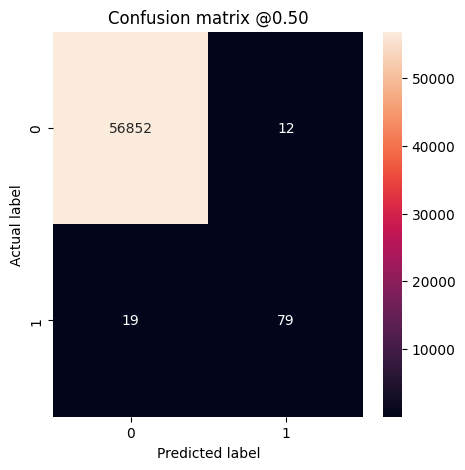

In [ ]:
plot_cm(test_labels, test_predictions_baseline)

### Plot the ROC

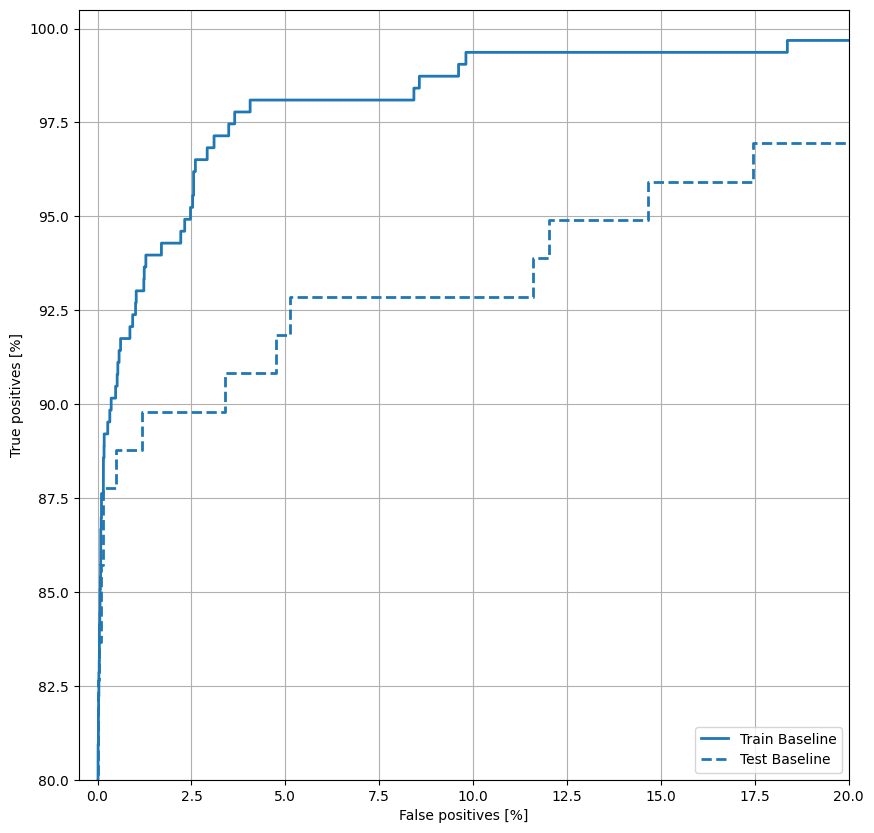

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

## Method 1: Class weights
We weight the classes based on the number of samples in the data set:

$$
w_i = \frac{N}{K \cdot n_i}
$$

Where:
- $w_i$ is the weight for class $i$
- $N$ is the total number of samples in the dataset
- $K$ is the number of classes
- $n_i$ is the number of samples in class $i$


In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


### Train a model with class weights

In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping()],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
results["weighted"] = weighted_model.evaluate(test_features, test_labels, return_dict=True)

weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - Brier score: 0.0018 - accuracy: 0.9980 - auc: 0.8424 - cross entropy: 0.0113 - fn: 132.0659 - fp: 207.8352 - loss: 2.1945 - prc: 0.4333 - precision: 0.4271 - recall: 0.5107 - tn: 150639.3281 - tp: 123.3407 - val_Brier score: 0.0011 - val_accuracy: 0.9988 - val_auc: 0.9174 - val_cross entropy: 0.0091 - val_fn: 30.0000 - val_fp: 25.0000 - val_loss: 0.0091 - val_prc: 0.5478 - val_precision: 0.6622 - val_recall: 0.6203 - val_tn: 45465.0000 - val_tp: 49.0000
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Brier score: 0.0043 - accuracy: 0.9950 - auc: 0.8792 - cross entropy: 0.0234 - fn: 66.2637 - fp: 412.1099 - loss: 0.9536 - prc: 0.3372 - precision: 0.1897 - recall: 0.5612 - tn: 93559.6719 - tp: 102.5275 - val_Brier score: 0.0015 - val_accuracy: 0.9982 - val_auc: 0.9386 - val_cross entropy: 0.0124 - val_fn: 20.0000 - val_fp: 61.0000 - val_loss: 0.0124 - val_prc: 0.6439 - val_precision: 0.4917 - val_recall: 0.7468 - val_tn: 45429.0000 - val_tp:

## Method 2: Oversampling
- Separate the positive and negative samples (training set) into two groups
- Sample equally from both groups

This creates a balanced dataset for training


In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

resampled_steps_per_epoch = int(np.ceil(2.0*neg/BATCH_SIZE))
resampled_steps_per_epoch

resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1]
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2)

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping()],
    validation_data=(val_ds))

train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
results["oversampled"] = resampled_model.evaluate(test_features, test_labels, return_dict=True)

resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
# for name, value in zip(resampled_model.metrics_names, resampled_results):
#   print(name, ': ', value)
# print()
# plot_cm(test_labels, test_predictions_resampled)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - Brier score: 0.0868 - accuracy: 0.8758 - auc: 0.8674 - cross entropy: 0.3225 - fn: 4623.3809 - fp: 5843.1904 - loss: 1.1947 - prc: 0.6332 - precision: 0.5233 - recall: 0.5780 - tn: 62173.1445 - tp: 6752.7617 - val_Brier score: 0.2653 - val_accuracy: 0.5281 - val_auc: 0.8813 - val_cross entropy: 0.7399 - val_fn: 8.0000 - val_fp: 21495.0000 - val_loss: 0.7399 - val_prc: 0.1323 - val_precision: 0.0033 - val_recall: 0.8987 - val_tn: 23995.0000 - val_tp: 71.0000
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - Brier score: 0.2343 - accuracy: 0.6487 - auc: 0.7590 - cross entropy: 0.7448 - fn: 2574.7144 - fp: 5208.0479 - loss: 0.7448 - prc: 0.8299 - precision: 0.6217 - recall: 0.7625 - tn: 6034.1904 - tp: 8613.5234 - val_Brier score: 0.2272 - val_accuracy: 0.6221 - val_auc: 0.9136 - val_cross entropy: 0.6531 - val_fn: 6.0000 - val_fp: 17215.0000 - val_loss: 0.6531 - val_prc: 0.4325 - val_precision: 0.0042 - val_recall: 0.9241 - val

### Plot the ROC for all models

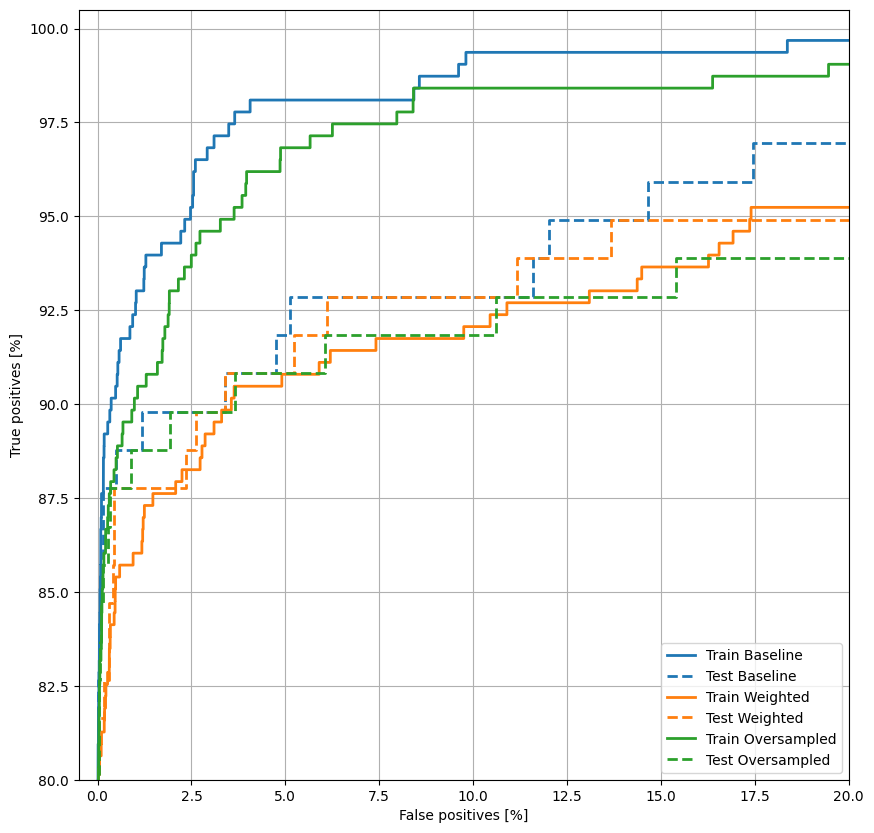

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')
plot_roc("Train Oversampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Oversampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');

# Regression/Continous data

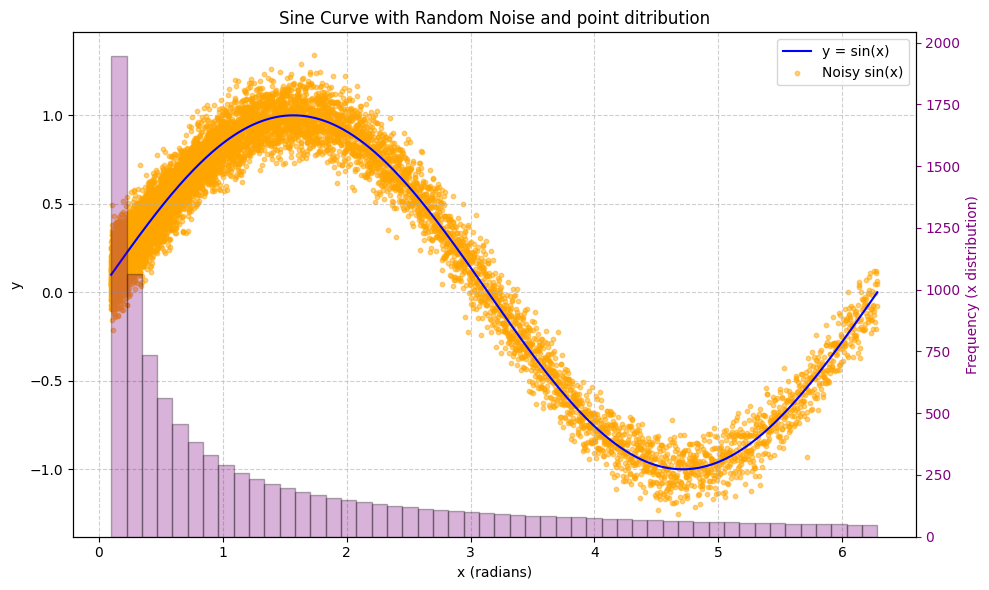

In [ ]:
import math
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# ---- 1) Generate data (log-spaced x, noisy sine y) ----
np.random.seed(42)
N = 10_000
x_np = np.logspace(-1, np.log10(2 * math.pi), N).astype(np.float32)  # shape (N,)
y_true_np = np.sin(x_np).astype(np.float32)
noise_np = np.random.normal(0, 0.1, size=y_true_np.shape).astype(np.float32)
y_np = y_true_np + noise_np

# Create the figure and main axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sine curves on the main axis
ax1.plot(x_np, y_true_np, label='y = sin(x)', color='blue')
ax1.scatter(x_np, y_np, label='Noisy sin(x)', color='orange', alpha=0.5, s=10)
ax1.set_xlabel("x (radians)")
ax1.set_ylabel("y")
ax1.set_title("Sine Curve with Random Noise and point ditribution")
ax1.legend(loc='upper right')
ax1.grid(True, which='both', ls='--', alpha=0.6)

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()

# Plot histogram on the right side
ax2.hist(x_np, bins=50, color='purple', alpha=0.3, edgecolor='black', orientation='vertical')
ax2.set_ylabel("Frequency (x distribution)", color='purple')
ax2.tick_params(axis='y', colors='purple')
# ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
# Optional: normalize x for easier learning (simple min-max to [0,1])
x_min, x_max = x_np.min(), x_np.max()
x_scaled_np = (x_np - x_min) / (x_max - x_min)

# To tensors, shape (N, 1)
x = torch.from_numpy(x_scaled_np).unsqueeze(1)
y = torch.from_numpy(y_np).unsqueeze(1)

# ---- 2) Train/test split ----
torch.manual_seed(42)
perm = torch.randperm(len(x))
train_ratio = 0.8
n_train = int(train_ratio * len(x))
train_idx, test_idx = perm[:n_train], perm[n_train:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test   = x[test_idx],  y[test_idx]

train_ds = TensorDataset(x_train, y_train)
test_ds  = TensorDataset(x_test,  y_test)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=512, shuffle=False)

# ---- 3) Model, loss, optimizer ----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

neurons = 16
model = nn.Sequential(
    nn.Linear(1, neurons),
    nn.ReLU(),
    nn.Linear(neurons, neurons),
    nn.ReLU(),
    nn.Linear(neurons, 1),
).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# ---- 4) Training loop ----
epochs = 200
for epoch in range(1, epochs + 1):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)

    if epoch % 20 == 0 or epoch == 1:
        avg_train = total_loss / len(train_ds)

        # quick test loss
        model.eval()
        with torch.no_grad():
            total_test = 0.0
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                total_test += criterion(pred, yb).item() * xb.size(0)
        avg_test = total_test / len(test_ds)

#       print(f"Epoch {epoch:3d} | train MSE: {avg_train:.5f} | test MSE: {avg_test:.5f}")

# Plot model prediction together with error
model.eval()
with torch.no_grad():
    # 1D inputs for prediction
    x_grid = torch.linspace(0, 1, 2000, device=device).unsqueeze(1)
    y_pred = model(x_grid).squeeze(1)            # (2000,)

# back to original x for plotting + true y
x_grid_orig = (x_grid.squeeze(1).cpu().numpy() * (x_max - x_min) + x_min)  # (2000,)
y_true_t = torch.sin(torch.from_numpy(x_grid_orig).to(device))             # (2000,)


print(f"Test MSE: {avg_test:.5f}")
# proper 1D error vector
error = (y_pred - y_true_t)**2                                              # (2000,)


# Convert grid back to original x scale for plotting
x_grid_orig = x_grid.cpu().squeeze(1).numpy() * (x_max - x_min) + x_min

# Plot the comparison
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(x_np, y_np, s=6, alpha=0.1, label="Noisy samples")
ax1.plot(x_grid_orig, np.sin(x_grid_orig), linewidth=2, label="True sin(x)")
ax1.plot(x_grid_orig, y_pred.cpu(), linewidth=2, linestyle="--", label="Model prediction")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend(loc='upper left')
ax1.grid(True, which="both", ls="--", alpha=0.6)

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()

# Plot histogram on the right side
ax2.plot(x_grid_orig, error.cpu(), color='red', alpha=0.7, label='Squared Error', linestyle='dashed')
ax2.set_ylabel("Squared Error", color='red')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', colors='red')
# ax2.set_yscale('log')


## Some solutions for regression / continuous data
- Label distribution smoothing
- Feature distribution smoothing
- WERCS
- SmoteR
- Random over/under sampling

# References

For classification:
* B. Nikpour, F. Rahmati, B. Mirzaei, H. Nezamabadi-pour, *A comprehensive review on data-level methods for imbalanced data classification*, Expert Systems with Applications, 2026, https://doi.org/10.1016/j.eswa.2025.128920
* A.N. Tarekegn, M. Giacobini, K. Michalak, *A review of methods for imbalanced multi-label classification*, Pattern Recognition, 2021, https://doi.org/10.1016/j.patcog.2021.107965

For regression:
* https://towardsdatascience.com/strategies-and-tactics-for-regression-on-imbalanced-data-61eeb0921fca/
* https://dl.acm.org/doi/abs/10.1016/j.neucom.2018.11.100?utm_source=chatgpt.com
* https://link.springer.com/article/10.1007/s10462-024-10724-3?
